<a href="https://colab.research.google.com/github/jamonsalve/AG3-Visualizacion/blob/main/AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Jairo Alberto Monsalve Henao

In [ ]:
#Importamos modulos

import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

#Cargamos el data set de los pasajeros del Titanic

url="http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
titanic.rename(columns={'fare': 'tarifa'},inplace=True)
titanic.rename(columns={'class': 'clase'},inplace=True)

In [ ]:
def is_old_func(row):
  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

In [ ]:
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

In [ ]:
#Consulta con condiciones

titanic[(titanic.sex == 'female') & (titanic['clase'].isin(['First', 'Third'])) & (titanic.age > 45 ) & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False


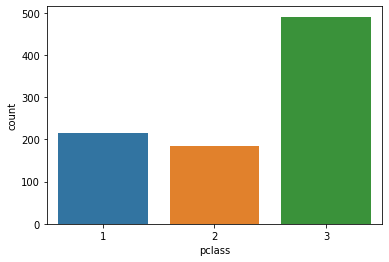

In [ ]:
#Distribución de las clases

sns.countplot(x="pclass", data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


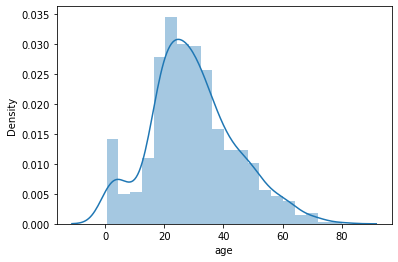

In [ ]:
#Distribución de la edad(ege)

sns.distplot(titanic.age.dropna( ))
plt.show( )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


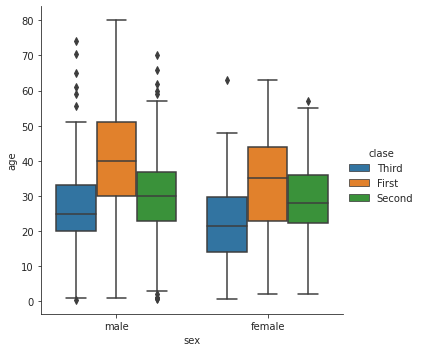

In [ ]:
#BoxPlot de la edad por sexo y clase

with sns.axes_style(style='ticks'): ax = sns.catplot("sex", "age", "clase" , data=titanic, kind="box")

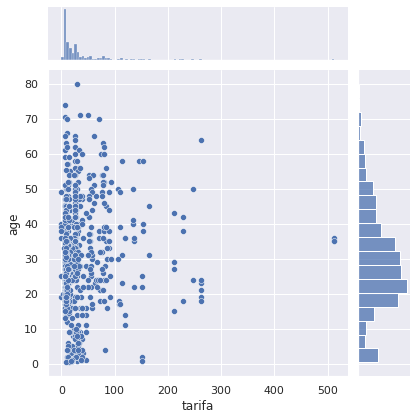

In [ ]:
#Distribución cruzada de Edad y Tarifa

sns.jointplot(x='tarifa',y='age',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

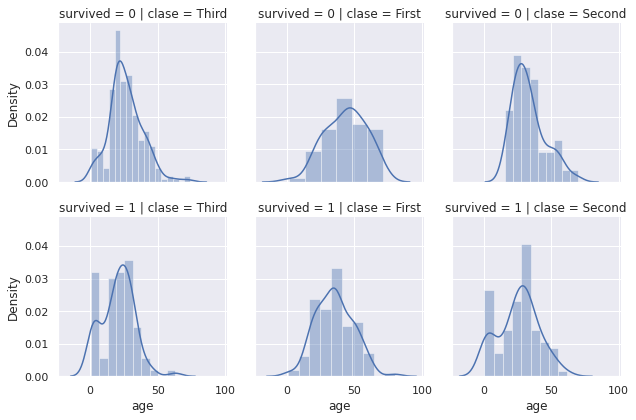

In [ ]:
#Cambiamos el font

sns.set(font_scale=1)

#FacetGrid - Construir una matriz de gráficos

g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")
plt.show()

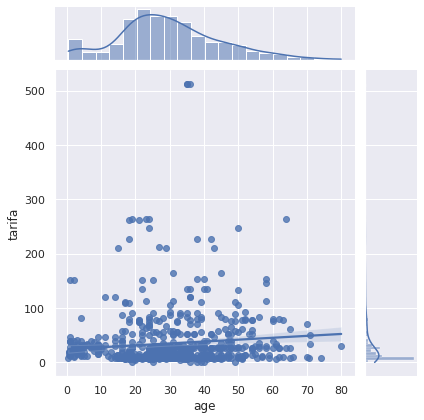

In [ ]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa',
kind='reg', color='b')
plt.show()